# Homework 01

> Hayden Chang 張皓鈞 B11030202 資工二乙

**Implementing Interval Partitioning algorithm**

There are several lectures and their starting and ending time are shown as below:

- Lecture 1: 9:00-10:00
- Lecture 2: 11:00-16:00
- Lecture 3: 12:30-13:30
- Lecture 4: 10:30-16:00
- Lecture 5: 9:30-14:00
- Lecture 6: 10:30-13:00
- Lecture 7: 11:30-15:30
- Lecture 8: 12:30-16:30
- Lecture 9: 11:00-12:00
- Lecture 10: 9:30-14:00
- Lecture 11: 11:30-17:00
- Lecture 12: 9:30-15:30
- Lecture 13: 12:00-17:30
- Lecture 14: 11:30-14:00
- Lecture 15: 12:30-15:00
- Lecture 16: 11:00-16:00
- Lecture 17: 12:00-17:00
- Lecture 18: 15:30-16:30
- Lecture 19: 16:30-17:30
- Lecture 20: 9:00-16:00

**Please write a program implementing Interval Partitioning algorithm to find the "minimum number" of classrooms to schedule all lectures so that no two occur at the same time in the same room.**

## \*Requirements:

1. Provide the final answer about the "minimum number" of classrooms. (4 point)
2. Provide your code, and explain why it works correctly on finding the above answer. (3 point)
3. Show your code has performace in O(nlogn). You could plot the growing trend of time-consuming with input data, and explain it. (3 point)


In [49]:
import heapq
from typing import List, Dict, Tuple

## Declare types


In [50]:
Lecture = Tuple[float, float]

## Implement greedy algorithm

In [51]:
import numpy as np

def min_classrooms(lectures: List[Tuple[float, float]]) -> Tuple[Dict[int, List[Tuple[float, float]]], int]:
    steps: int = 0

    # Sort the course according to the start time
    sorted_lectures = sorted(lectures, key=lambda x: x[0])

    # Priority queue (minimum heap) to track the end time of the current courses in different classrooms
    end_times: List[Tuple[float, int]] = []

    # Use the dictionary to track the courses distributed by each classroom
    classroom_allocations: Dict[int, List[Tuple[float, float]]] = {}

    # Time complexity of heappop and heappush operations are O(log n)
    for start, end in sorted_lectures:
        steps += np.log2(len(sorted_lectures))
        if end_times and start >= end_times[0][0]:
            # If the earliest ending time is less than or equal to the start 
            # time of the current course, this means that we can reuse the classroom, 
            # so the earliest ending time pops up
            _, room = heapq.heappop(end_times)
            classroom_allocations[room].append((start, end))
        else:
            # If there is no classroom, create a new classroom
            room = len(classroom_allocations)
            classroom_allocations[room] = [(start, end)]

        # Add the end of the current course to the priority queue
        heapq.heappush(end_times, (end, room))

    return (classroom_allocations, steps)

## Test data

In [52]:
lectures: List[Lecture] = [
    (9.0, 10.0), (11.0, 16.0), (12.5, 13.5), (10.5, 16.0), (9.5, 14.0),
    (10.5, 13.0), (11.5, 15.5), (12.5, 16.5), (11.0, 12.0), (9.5, 14.0),
    (11.5, 17.0), (9.5, 15.5), (12.0, 17.5), (11.5, 14.0), (12.5, 15.0),
    (11.0, 16.0), (12.0, 17.0), (15.5, 16.5), (16.5, 17.5), (9.0, 16.0)
]

result, _ = min_classrooms(lectures)

print(f"total classrooms = {len(result)}")

for room, lectures in result.items():
    print(f"classroom {room}: {lectures}")

total classrooms = 16
classroom 0: [(9.0, 10.0), (10.5, 16.0)]
classroom 1: [(9.0, 16.0)]
classroom 2: [(9.5, 14.0)]
classroom 3: [(9.5, 14.0)]
classroom 4: [(9.5, 15.5)]
classroom 5: [(10.5, 13.0), (15.5, 16.5)]
classroom 6: [(11.0, 16.0)]
classroom 7: [(11.0, 12.0), (12.0, 17.5)]
classroom 8: [(11.0, 16.0)]
classroom 9: [(11.5, 15.5)]
classroom 10: [(11.5, 17.0)]
classroom 11: [(11.5, 14.0)]
classroom 12: [(12.0, 17.0)]
classroom 13: [(12.5, 13.5), (16.5, 17.5)]
classroom 14: [(12.5, 16.5)]
classroom 15: [(12.5, 15.0)]


## Draw the schedule table

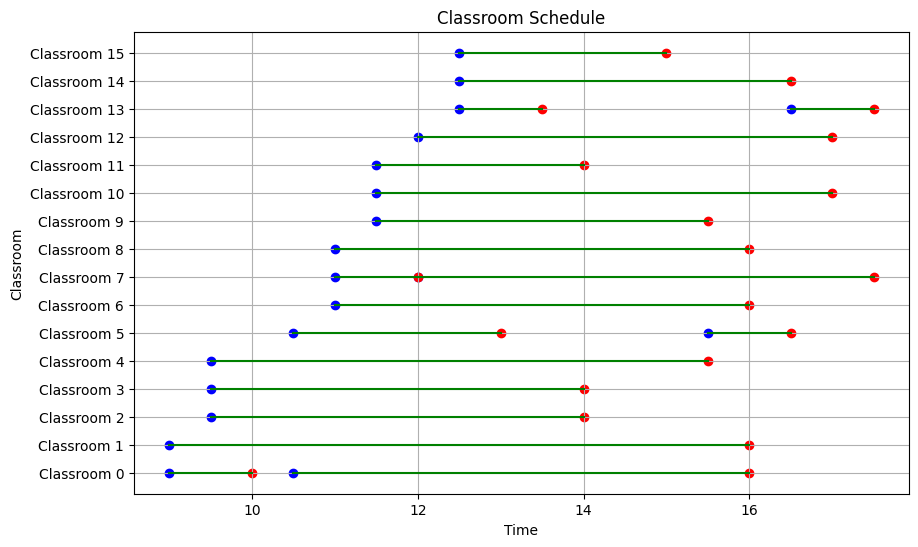

In [53]:
import matplotlib.pyplot as plt

def plot_schedule(allocations) -> None:
    plt.figure(figsize=(10, 6))

    for room, lectures in allocations.items():
        start_times = [lecture[0] for lecture in lectures]
        end_times = [lecture[1] for lecture in lectures]
        
        y = [room] * len(start_times)
        
        plt.scatter(start_times, y, color='b')
        plt.scatter(end_times, y, color='r')
        
        for i in range(len(start_times)):
            plt.plot([start_times[i], end_times[i]], [y[i], y[i]], color='g')

    plt.xlabel('Time')
    plt.ylabel('Classroom')
    plt.title('Classroom Schedule')
    plt.yticks(list(allocations.keys()), [f'Classroom {room}' for room in allocations.keys()])
    plt.grid(True)
    plt.show()

plot_schedule(result)

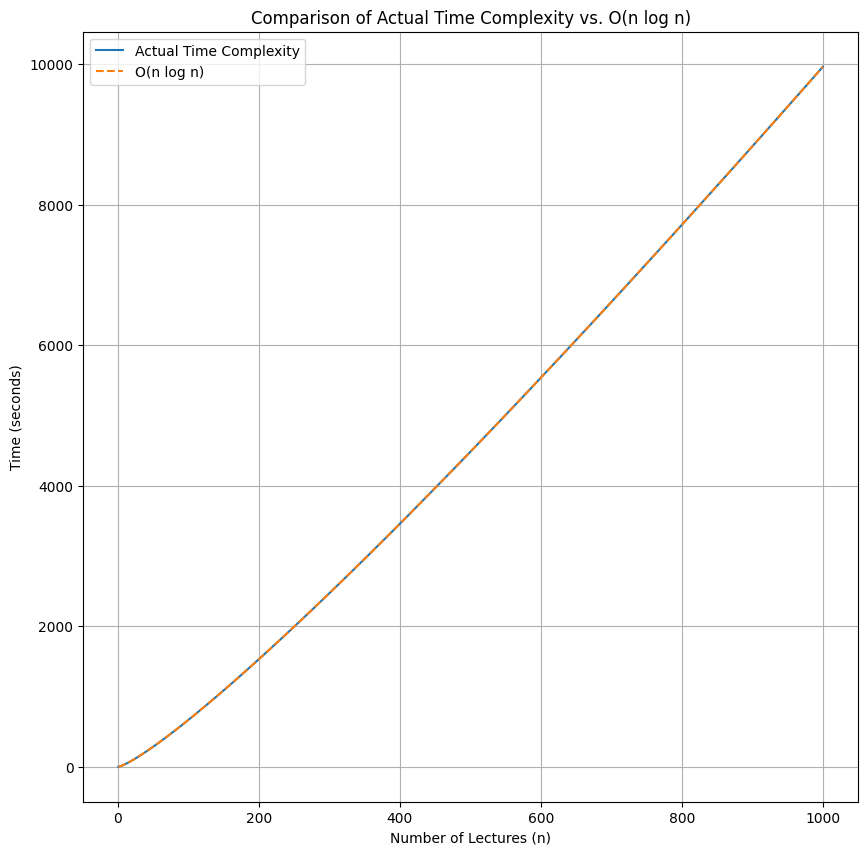

In [54]:
import random
from typing import Tuple
import numpy as np

def generate_lectures(n) -> list[Tuple[float, float]]:
    lectures: list[Lecture] = []
    for _ in range(n):
      start = random.uniform(0, 24)
      end = random.uniform(start, 24)
      lectures.append((start, end))
    return lectures

def timing_experiment(max_n) -> Tuple[list[int], list[int]]:
    times: list[int] = []
    n_values = list(range(1, max_n + 1))

    for n in n_values:
        lectures = generate_lectures(n)

        _, steps = min_classrooms(lectures)

        times.append(steps)

    return n_values, times

# do time complexity test
max_n = 1000
n_values, times = timing_experiment(max_n)

# draw time complexity plots
plt.figure(figsize=(10, 10))
plt.plot(n_values, times, label='Actual Time Complexity')
plt.plot(n_values, [n * np.log2(n) for n in n_values], label='O(n log n)', linestyle='--')
plt.xlabel('Number of Lectures (n)')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Actual Time Complexity vs. O(n log n)')
plt.legend()
plt.grid(True)
plt.show()